In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=load_iris()

In [3]:
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']

Text(0.5,1,'GMM Classification')

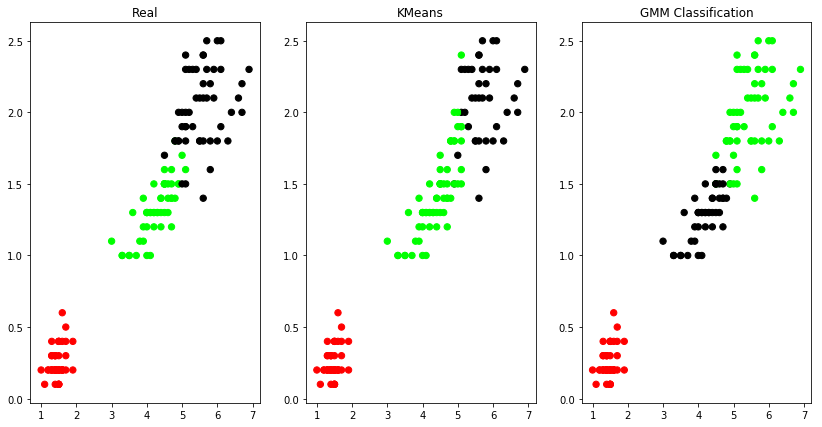

In [6]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
#REAL PLOT
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')
#K-PLOT
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans')
#GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

In [7]:
sm.accuracy_score(y, predY)

0.8933333333333333

In [8]:
sm.confusion_matrix(y, predY)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])